### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/raw/data.csv')

In [3]:
df.describe()

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,40.655800,14.935600,169.513100,6.975200,10.98120,6.948000,4.991600,75.389223,117257.446300,9.49360
std,2886.89568,11.005101,8.359931,28.775487,4.295606,4.89633,4.330332,2.586232,14.450485,47410.812846,5.76471
min,1.00000,22.000000,1.000000,120.000000,0.000000,3.00000,0.000000,1.000000,50.000000,35001.000000,0.00000
25%,2500.75000,31.000000,8.000000,145.000000,3.000000,7.00000,3.000000,3.000000,62.855000,75761.750000,4.00000
50%,5000.50000,41.000000,15.000000,170.000000,7.000000,11.00000,7.000000,5.000000,75.535000,117645.000000,9.00000
75%,7500.25000,50.000000,22.000000,194.000000,11.000000,15.00000,11.000000,7.000000,88.032500,157836.750000,14.00000
max,10000.00000,59.000000,29.000000,219.000000,14.000000,19.00000,14.000000,9.000000,100.000000,199997.000000,19.00000


In [4]:
df.head()

,Employee_ID,Age,Department,Job_Level,Years_at_Company,Monthly_Hours_Worked,Remote_Work,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Work_Life_Balance,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
0,1,45,Marketing,Mid,29,198,No,1,7,1,Good,5,88.73,182971,2
1,2,38,Marketing,Mid,7,157,Yes,13,3,10,Excellent,1,74.70,74217,13
2,3,53,Sales,Mid,8,146,No,2,15,11,Poor,4,67.85,176003,16
3,4,46,Finance,Mid,4,200,No,4,9,0,Poor,5,93.73,69209,1
4,5,28,Finance,Manager,5,193,Hybrid,11,9,6,Poor,7,93.30,195477,5


In [5]:
df.shape

(10000, 15)

In [6]:
df.nunique()

Employee_ID                10000
Age                           38
Department                     6
Job_Level                      4
Years_at_Company              29
Monthly_Hours_Worked         100
Remote_Work                    3
Meetings_per_Week             15
Tasks_Completed_Per_Day       17
Overtime_Hours_Per_Week       15
Work_Life_Balance              4
Job_Satisfaction               9
Productivity_Score          4333
Annual_Salary               9718
Absences_Per_Year             20
dtype: int64

In [7]:
df.isnull().sum()

Employee_ID                0
Age                        0
Department                 0
Job_Level                  0
Years_at_Company           0
Monthly_Hours_Worked       0
Remote_Work                0
Meetings_per_Week          0
Tasks_Completed_Per_Day    0
Overtime_Hours_Per_Week    0
Work_Life_Balance          0
Job_Satisfaction           0
Productivity_Score         0
Annual_Salary              0
Absences_Per_Year          0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Observation
1. Dataset have No Null Values.
2. Dataset have no Duplicates.

#### Dropping `Employee_ID` column as it is irrelevant for prediction.

In [9]:
df.drop(columns=['Employee_ID'],inplace=True)

In [10]:
cols = list(df.columns)

In [11]:
for i in cols :
    print(f"{i} --> {df[i].dtype} --> {df[i].nunique()}")

Age --> int64 --> 38
Department --> object --> 6
Job_Level --> object --> 4
Years_at_Company --> int64 --> 29
Monthly_Hours_Worked --> int64 --> 100
Remote_Work --> object --> 3
Meetings_per_Week --> int64 --> 15
Tasks_Completed_Per_Day --> int64 --> 17
Overtime_Hours_Per_Week --> int64 --> 15
Work_Life_Balance --> object --> 4
Job_Satisfaction --> int64 --> 9
Productivity_Score --> float64 --> 4333
Annual_Salary --> int64 --> 9718
Absences_Per_Year --> int64 --> 20


### Observation : 
1. JOB_SATISFACTION is a categorical column but it is given numerical.

In [12]:
df['Job_Satisfaction'] = df['Job_Satisfaction'].astype('object')

In [13]:
for i in cols :
    print(f"{i} --> {df[i].dtype}")

Age --> int64
Department --> object
Job_Level --> object
Years_at_Company --> int64
Monthly_Hours_Worked --> int64
Remote_Work --> object
Meetings_per_Week --> int64
Tasks_Completed_Per_Day --> int64
Overtime_Hours_Per_Week --> int64
Work_Life_Balance --> object
Job_Satisfaction --> object
Productivity_Score --> float64
Annual_Salary --> int64
Absences_Per_Year --> int64


In [14]:
num_col = []
cat_col = []

for i in cols:
    if(df[i].dtype == 'object'):
        cat_col.append(i)
    else :
        num_col.append(i)    

### Visualization

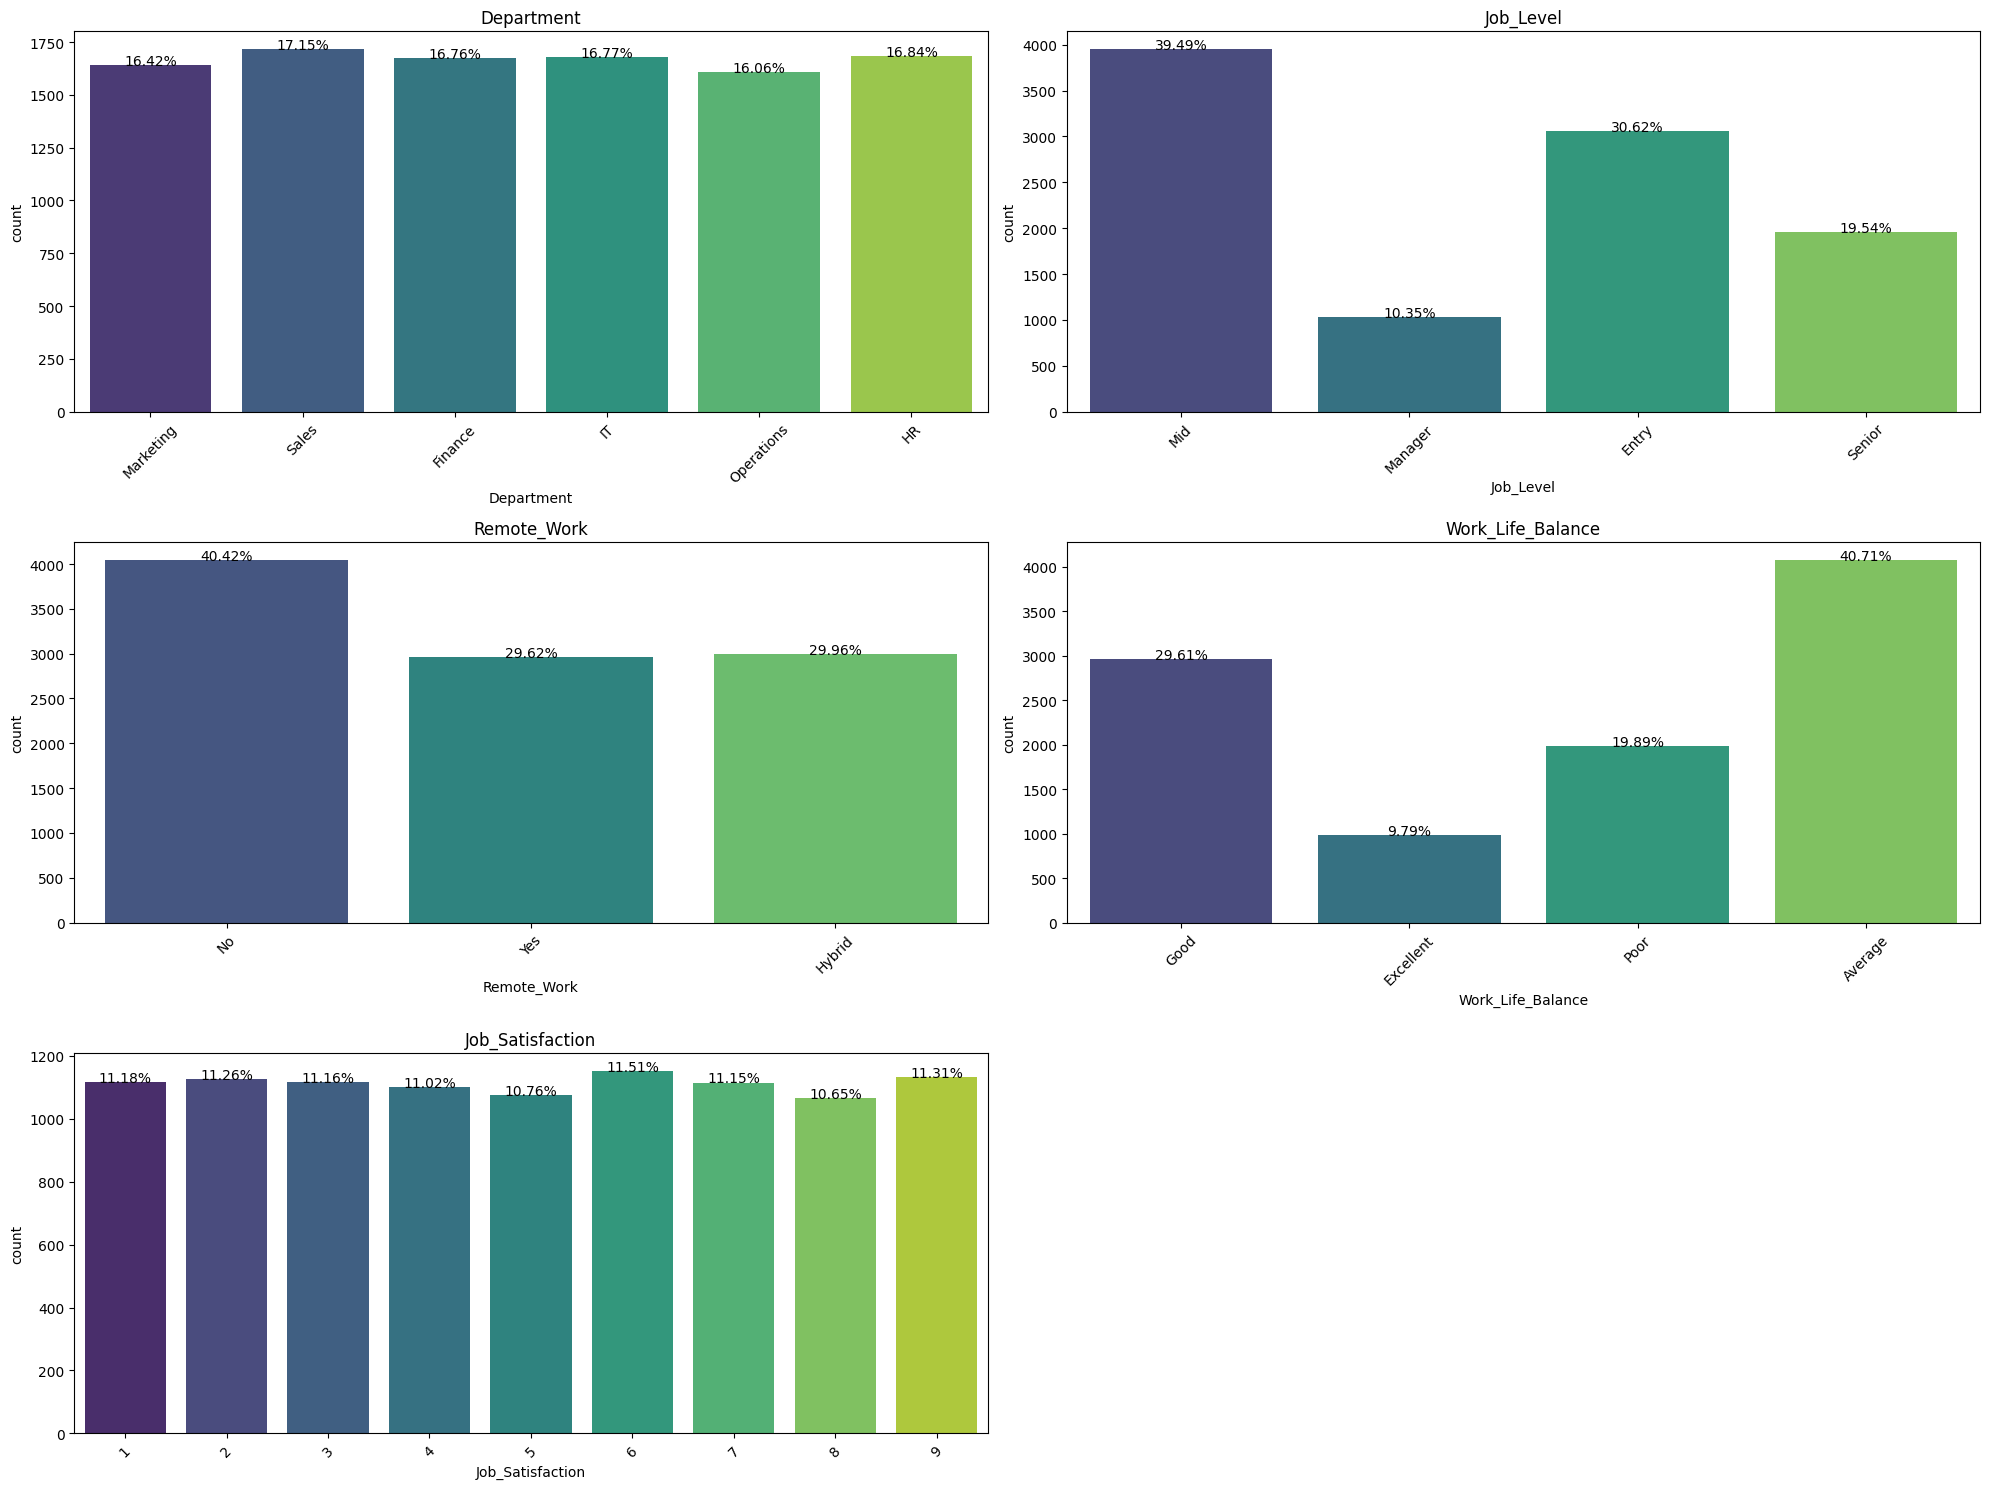

In [15]:
import math
n = len(cat_col)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))
axes = axes.flatten()

plot_idx = 0  # To track subplot index

for col in cat_col:

    ax = axes[plot_idx]
    sns.countplot(data=df, x=col, ax=ax, palette='viridis')
    ax.set_title(f'{col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # ➕ Add percentage labels on top of bars
    total = len(df[col].dropna())  # Total count for this column (excluding NaNs)

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{percentage:.2f}%', ha="center", fontsize=10)

    plot_idx += 1

# 🧹 Hide unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("cat_col_countplot.png")
plt.show()


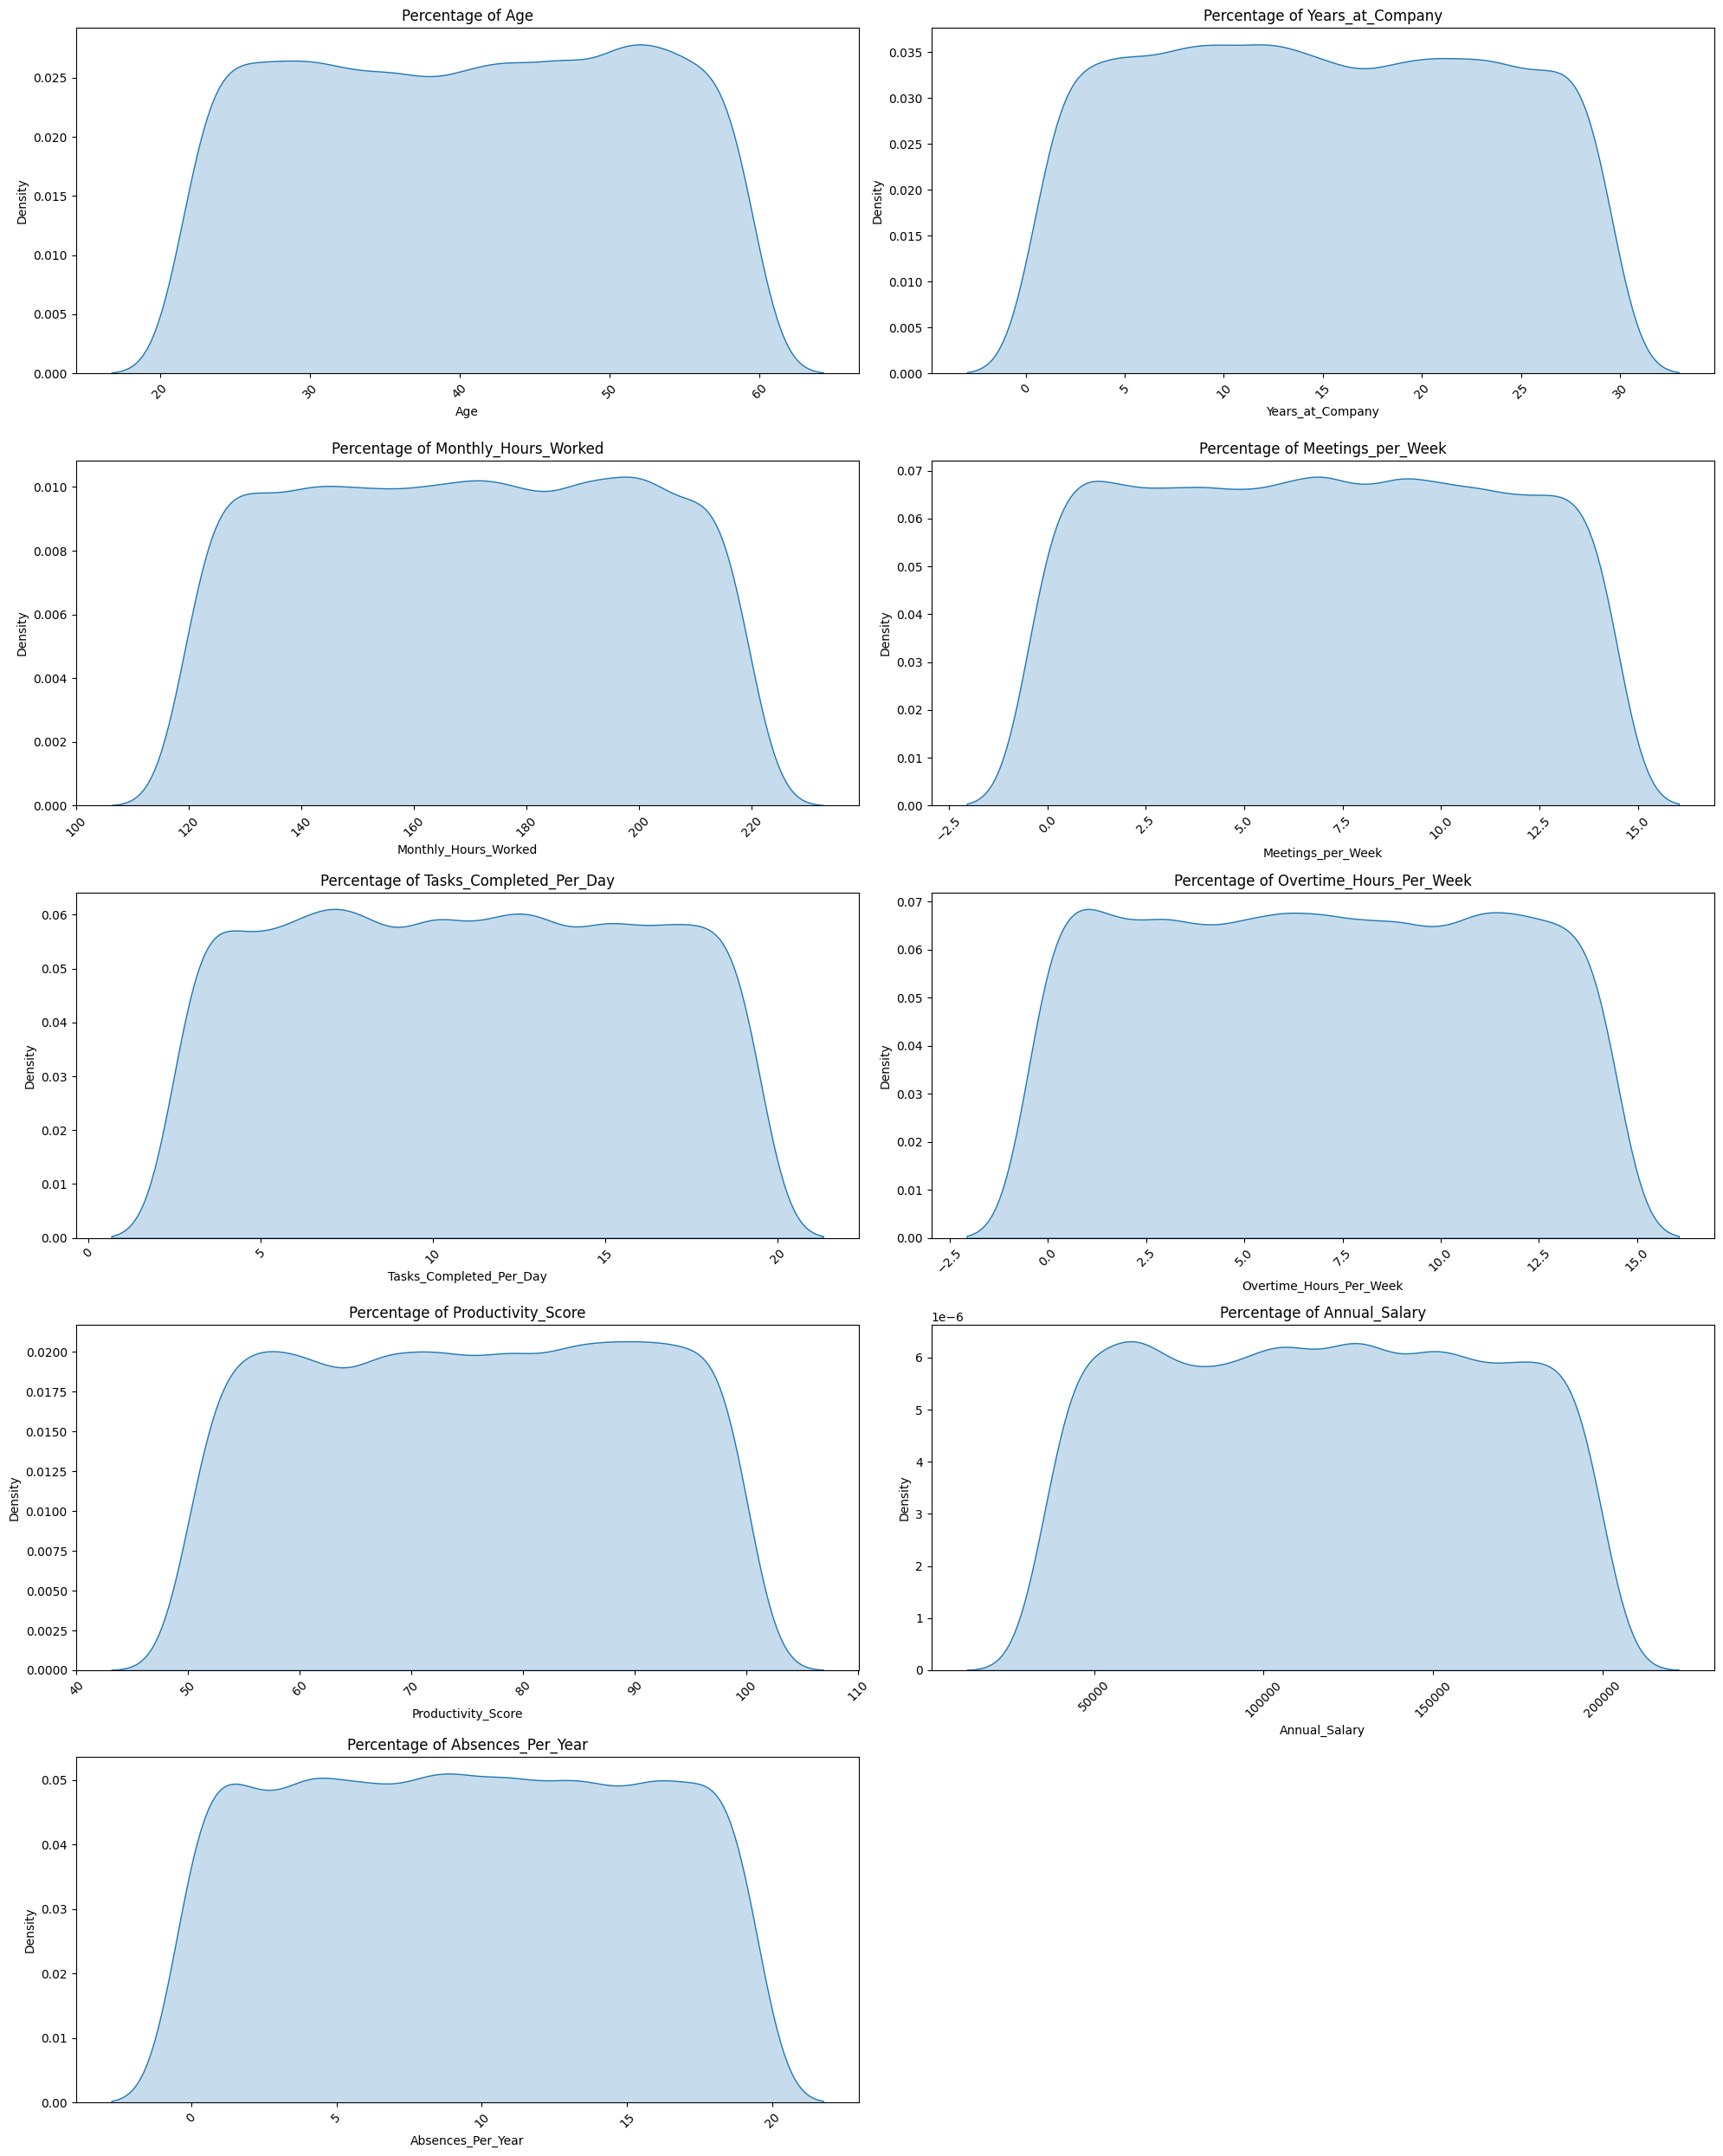

In [16]:
n = len(num_col) 
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))
axes = axes.flatten()

plot_idx = 0  # To track subplot index

for col in num_col:
    ax = axes[plot_idx]
    # if(col in ['Departure Delay in Minutes','Arrival Delay in Minutes']) :
    #     sns.histplot(data=df, x=col, ax=ax,log_scale=True)
    # else : 
    #     sns.histplot(data=df, x=col, ax=ax,kde=True)    
    sns.kdeplot(data=df, x=col, ax=ax,fill=True)
    ax.set_title(f'Percentage of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plot_idx += 1

# Hide unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("num_col_kdeplot.png")
plt.show()


#### Correlation Heatmap

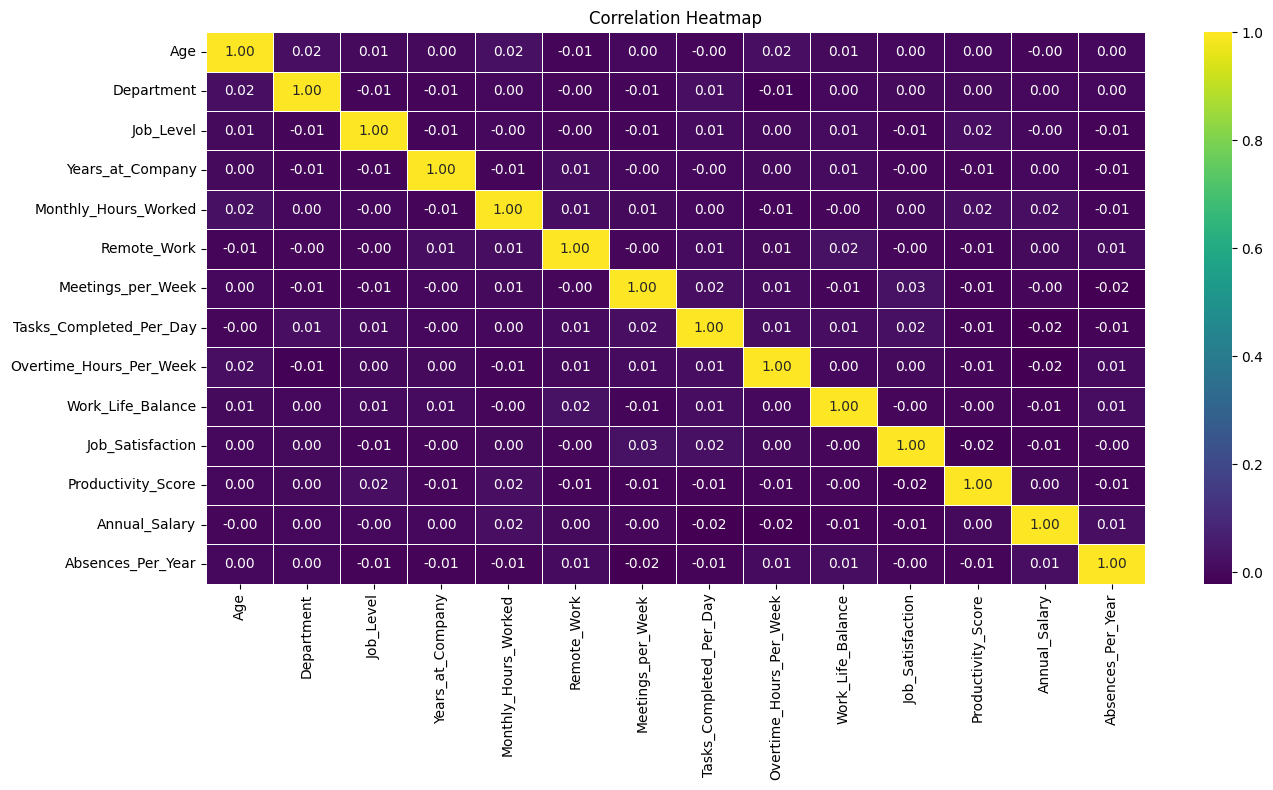

In [17]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy(deep=False)
for i in cat_col:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



### Observation :
1. Columns like `Annual_Salary`,`Department` and `Age` have negligible impact on Productivity_Score so dropping them.
<br><br>
2. Not dropping `Work_Life_Balance` column even after seeing correlation heatmap that it has negligible impact on `Productivity_Score` because intuitively it makes sense that work-life balance can impact productivity, even if the correlation is not strong.

In [18]:
df.drop(columns=['Annual_Salary','Department','Age'],inplace=True)

In [19]:
X = df.drop(columns=['Productivity_Score'])
y = df['Productivity_Score']

## Refer for [How to Find Outliners](https://www.scribbr.com/statistics/outliers/)?

In [20]:
def get_bounds(df,col):
    X = sorted(df[col],reverse=False)
    Q1 = X[int(len(X)*0.25)]
    Q3 = X[int(len(X)*0.75)]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def count_outliners(df,col):
    X = df[col]
    low,up = get_bounds(df,col)
    cnt = 0
    for i in X:
        if i < low or i > up :
            cnt+=1
    return cnt
print("Outliers Analysis:")
print("-" * 50)
for i in list(df.columns):
    if i in num_col:
        cnt = count_outliners(df,i)
        total_cnt = len(df[i])
        percentage = round((cnt/total_cnt) * 100,2)
        print(f"{i}:") 
        print(f"Count : {cnt}")   
        print(f"Percentage : {percentage}%")
        print("-" * 50)


    

Outliers Analysis:
--------------------------------------------------
Years_at_Company:
Count : 0
Percentage : 0.0%
--------------------------------------------------
Monthly_Hours_Worked:
Count : 0
Percentage : 0.0%
--------------------------------------------------
Meetings_per_Week:
Count : 0
Percentage : 0.0%
--------------------------------------------------
Tasks_Completed_Per_Day:
Count : 0
Percentage : 0.0%
--------------------------------------------------
Overtime_Hours_Per_Week:
Count : 0
Percentage : 0.0%
--------------------------------------------------
Productivity_Score:
Count : 0
Percentage : 0.0%
--------------------------------------------------
Absences_Per_Year:
Count : 0
Percentage : 0.0%
--------------------------------------------------


### Observation:
- No outliers found in the dataset.

### Train - Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
num_col1 = []
cat_col1 = []

for i in df.columns:
    if i == 'Productivity_Score':
        continue
    if(df[i].dtype == 'object'):
        cat_col1.append(i)
    else :
        num_col1.append(i)

In [35]:
list(df.columns)

['Job_Level',
 'Years_at_Company',
 'Monthly_Hours_Worked',
 'Remote_Work',
 'Meetings_per_Week',
 'Tasks_Completed_Per_Day',
 'Overtime_Hours_Per_Week',
 'Work_Life_Balance',
 'Job_Satisfaction',
 'Productivity_Score',
 'Absences_Per_Year']

#### Creating Preprocessing Pipeline

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_pipeline = make_pipeline(
    StandardScaler()
)

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)
preprocessing = ColumnTransformer(
    transformers=[
        ("num",num_pipeline,num_col1),
        ("cat",cat_pipeline,cat_col1)
    ]
)

In [24]:
num_col1

['Years_at_Company',
 'Monthly_Hours_Worked',
 'Meetings_per_Week',
 'Tasks_Completed_Per_Day',
 'Overtime_Hours_Per_Week',
 'Absences_Per_Year']

In [25]:
X_train_pre = preprocessing.fit_transform(X_train)
X_test_pre = preprocessing.transform(X_test)

### Model Training

#### Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_pre,y_train)
y_pred = lr.predict(X_test_pre)

In [27]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 12.498613256254291
RMSE: 14.490393793814242
R2 Score: -0.005094979916541398


#### Support Vector Regression Model

In [28]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_pre,y_train)
y_pred = svr.predict(X_test_pre)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 12.581116181347362
RMSE: 14.610631283349107
R2 Score: -0.021844212555846676


#### Decision Tree Regression Model

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_pre,y_train)
y_pred = dt.predict(X_test_pre)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 16.56188
RMSE: 20.41858741441239
R2 Score: -0.9957131321040111


#### Random Forest Regression Model

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_pre,y_train)
y_pred = rf.predict(X_test_pre)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 12.5994084
RMSE: 14.73864287746806
R2 Score: -0.039828506763682325


Note : Out of all the models, Random Forest Regression Model is giving the best performance with a `Mean Absolute Error`,
`Root Mean Squared Error` and `R2 Score` and hence fine-tuned it for better performance using `GridSearchCV`.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50,100,200,300],
    'max_depth': [None,5,10],
    'min_samples_split': [2, 5,10,50],
    'min_samples_leaf': [1,2,5,20]
}
rf_1 = RandomForestRegressor()
rf_grid = RandomizedSearchCV(estimator=rf_1,param_distributions=params, cv=5,scoring='neg_mean_squared_error', verbose=2, n_jobs=-1,n_iter=20)
rf_grid.fit(X_train_pre, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 5, 20],
                                        'min_samples_split': [2, 5, 10, 50],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=2)

In [32]:
print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 5}


In [33]:
rf_best = rf_grid.best_estimator_
y_pred = rf_best.predict(X_test_pre)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.3f}")

MAE: 12.49
RMSE: 14.47
R2 Score: -0.003


#### Conclusion : 
Random Forest model is fine-tuned and have best performance.
